# Author : Daniel Afeamenyo

## Task 2 : Prediction using Unsupervised Machine Learning
In this task,it is required to predict the optimum number of cluster for the Iris data set. Iris data set consists of 3 types of flower namely Iris-setosa, Iris-versicolour and Iris-virginica.
## GRIP @ The Sparks Foundation
 




In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Load the Iris dataset into a Pandas DataFrame




In [18]:
iris_df = pd.read_csv("/Iris.csv")
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
# Dropping Species an ID from the dataset
iris_df = pd.DataFrame(iris_df)
iris_df = iris_df.drop(columns=['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


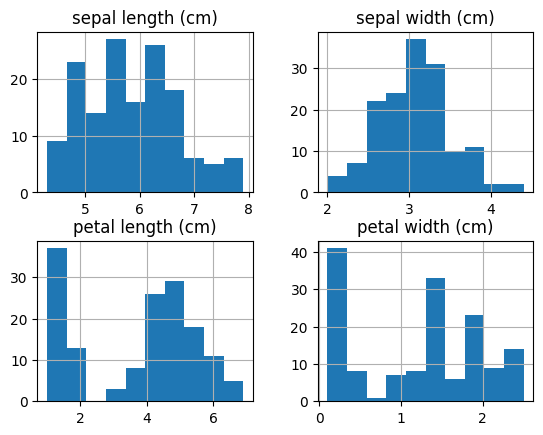

In [12]:
# Visualizing the distribution of each feature using histograms
iris_df.hist()
plt.show()

Separate the features from the target variable and Standardize



In [22]:
X = iris_df.iloc[:, :-1].values  # Extract the features
y = iris_df.iloc[:, -1].values   # Extract the target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Perform K-means Clustering  and plot the Elbow Curve

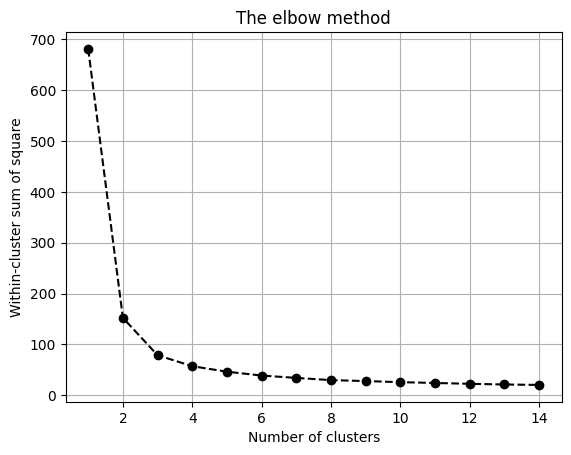

In [26]:
# Perform K-means clustering for different values of k
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)
     

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--' , color='black')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()


We can clearly see why it is called 'The elbow method' from the above graph,the optimum clusters is where the elbow occurs.This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [27]:
# From this we choose the number of clusters as 3
model = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
predictions=model.fit_predict(iris_df)


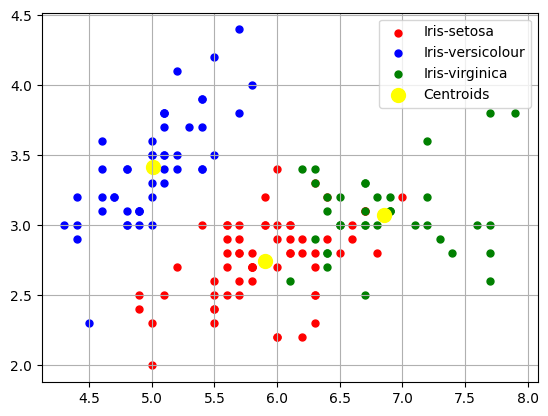

In [28]:
# Visualising the clusters 
x=iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=25,c='red',label= 'Iris-setosa')
plt.scatter(x[predictions==1,0],x[predictions==1,1],s=25,c='blue',label= 'Iris-versicolour')
plt.scatter(x[predictions==2,0],x[predictions==2,1],s=25,c='green',label= 'Iris-virginica')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()
plt.grid()
plt.show()




# Thank You